In [1]:
from multiprocessing import Pool
import matplotlib.pyplot as plt
from eddy import rotationmap
import numpy as np

The data is a little big (30.5MB per file) so I've always had them loaded up on the Harvard Dataverse: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/KXELJL.

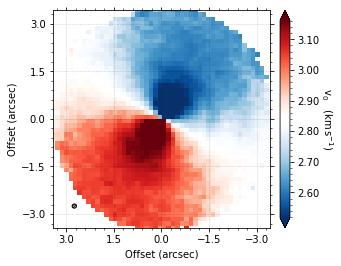

In [2]:
cube = rotationmap(path='../../cubes/TWHya_CO_cube_v0.fits',
                   uncertainty='../../cubes/TWHya_CO_cube_dv0.fits',
                   downsample='beam',
                   FOV=7.0)
cube.plot_data()

This initial run gives an idea of what the 'good' parameters are.

Assuming:
	p0 = [x0, y0, PA, mstar, vlsr].


100%|██████████| 1200/1200 [01:05<00:00, 18.46it/s]


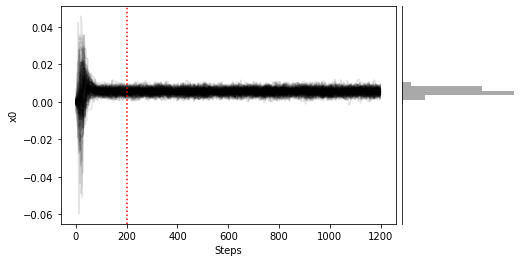

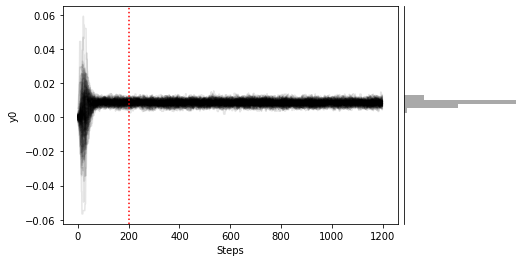

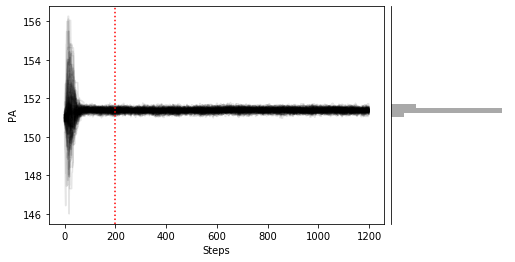

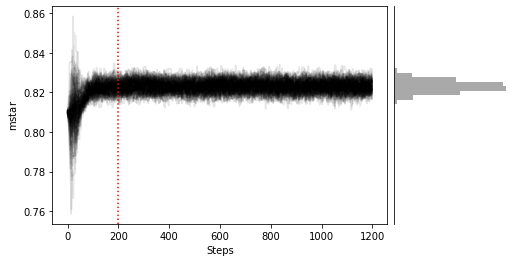

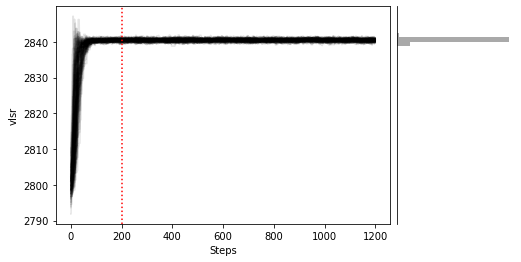

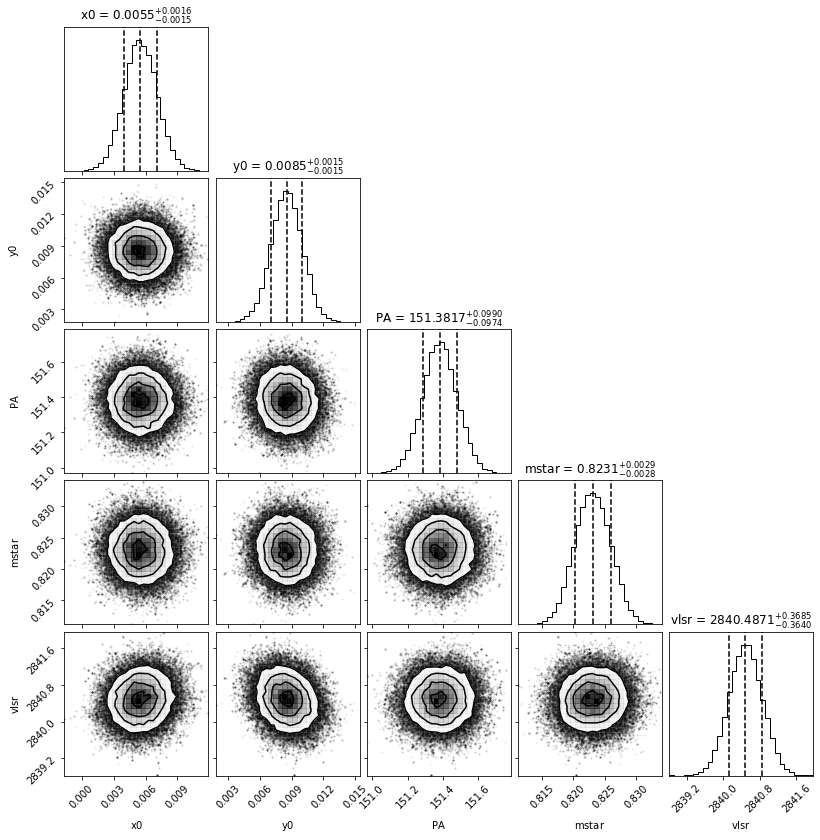

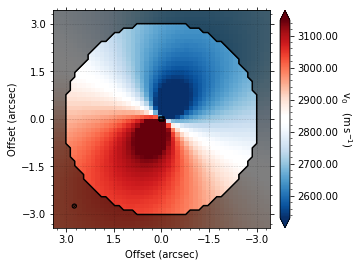

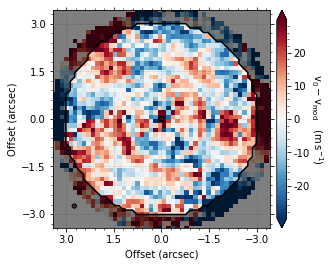

In [3]:
# Dictionary to contain the disk parameters.

params = {}

# Start with the free variables in p0.

params['x0'] = 0
params['y0'] = 1
params['PA'] = 2
params['mstar'] = 3
params['vlsr'] = 4

# Provide starting guesses for these values.

p0 = [0.0, 0.0, 151., 0.81, 2.8e3]

# Fix the other parameters. All values which are to be fixed must be floats.

params['inc'] = 5.8    # degrees
params['dist'] = 60.1  # parsec
params['r_min'] = 0.2  # arcsec
params['r_max'] = 3.0  # arcsec

# Run the sampler.

samples = cube.fit_map(p0=p0,
                       params=params,
                       optimize=False,
                       nwalkers=128,
                       nburnin=200,
                       nsteps=1000)

For this dataset, when using $i = 5.8^{\circ}$ (inclination) and $d = 60.1~{\rm pc}$ (distance) it would be considered a 'pass' if:

\begin{align}
|x0| &\leq 0.1^{\prime\prime} \\ 
|y0| &\leq 0.1^{\prime\prime} \\ 
|{\rm PA} - 151.0| &\leq 2^{\circ} \\ 
|M_{*} - 0.8| &\leq 0.5~M_{\rm sun} \\ 
|v_{\rm LSR} - 2840| &\leq 10~{\rm m\,s^{-1}} \\ 
\end{align}

There is a large degeneracy between $\{i,\, M_{*},\, d\}$ so the standard is to hold $i$ and $d$ fixed.